In [2]:
import pandas as pd

##from heart-disease.names
#7. Attribute Information:
#   -- Only 14 used
#      -- 1. #3  (age)       
#      -- 2. #4  (sex)       
#      -- 3. #9  (cp)        
#      -- 4. #10 (trestbps)  
#      -- 5. #12 (chol)      
#      -- 6. #16 (fbs)       
#      -- 7. #19 (restecg)   
#      -- 8. #32 (thalach)   
#      -- 9. #38 (exang)     
#      -- 10. #40 (oldpeak)   
#      -- 11. #41 (slope)     
#      -- 12. #44 (ca)        
#      -- 13. #51 (thal)      
#      -- 14. #58 (num)       (the predicted attribute)'
attributes=['age','sex','cp','trestbps','chol','fbs','restecg','thalach',
            'exang','oldpeak','slope','ca','thal','num']

ds_raw = pd.read_csv('./heart-disease/processed.cleveland.data',names=attributes)

ds_processed = pd.DataFrame()
ds_processed['age'] = ds_raw['age'].astype(int)
ds_processed['sex'] = ds_raw['sex'].map({1.0:'male', 0.0:'female'})
ds_processed['chest_pain_type'] = ds_raw['cp'].map({1.0:'angina', 2.0:'abnang', 3.0:'notang', 4.0:'asympt'})
ds_processed['resting_blood_pressure'] = ds_raw['trestbps']
ds_processed['cholestoral'] = ds_raw['chol']
ds_processed['fasting_blood_sugar'] = ds_raw['fbs'].map({1.0:True, 0.0:False})
ds_processed['resting_electrocardiographic'] = ds_raw['restecg'].map({1.0:'abn',2.0:'hyp',0.0:'norm'})
ds_processed['maximum_heart_rate '] = ds_raw['thalach'] 
ds_processed['exercise_induced_angina'] = ds_raw['exang'].map({1.0:True, 0.0:False})
ds_processed['st_depression']  = ds_raw['oldpeak']
ds_processed['st_slope'] = ds_raw['slope'].map({3.0:'down', 2.0:'flat', 1.0:'up'})
ds_processed['num_colored_major_vessels'] = pd.to_numeric(ds_raw['ca'],errors='coerce')
ds_processed['thalassemias'] = ds_raw['thal'].map({'6.0':'fix', '3.0':'norm', '7.0':'rev', '?':'unknown'})
ds_processed['sick'] = ds_raw['num'].map(lambda val: val != 0)
display(ds_processed.head())
display(ds_processed.dtypes)

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate,exercise_induced_angina,st_depression,st_slope,num_colored_major_vessels,thalassemias,sick
0,63,male,angina,145.0,233.0,True,hyp,150.0,False,2.3,down,0.0,fix,False
1,67,male,asympt,160.0,286.0,False,hyp,108.0,True,1.5,flat,3.0,norm,True
2,67,male,asympt,120.0,229.0,False,hyp,129.0,True,2.6,flat,2.0,rev,True
3,37,male,notang,130.0,250.0,False,norm,187.0,False,3.5,down,0.0,norm,False
4,41,female,abnang,130.0,204.0,False,hyp,172.0,False,1.4,up,0.0,norm,False


age                               int64
sex                              object
chest_pain_type                  object
resting_blood_pressure          float64
cholestoral                     float64
fasting_blood_sugar                bool
resting_electrocardiographic     object
maximum_heart_rate              float64
exercise_induced_angina            bool
st_depression                   float64
st_slope                         object
num_colored_major_vessels       float64
thalassemias                     object
sick                               bool
dtype: object

In [3]:
#clean
ds_processed = ds_processed[ds_processed['num_colored_major_vessels'].notnull()]
ds_processed = ds_processed[ds_processed['thalassemias']!='unknown']

In [4]:
y = ds_processed['sick']
X = pd.get_dummies(ds_processed.drop(columns=['sick']),drop_first=True,dtype=bool)
            

In [18]:
display(y)
display(X)
export = X.copy()
export['is_sick']=y
export.to_csv('./heart_processed.csv')

0      False
1       True
2       True
3      False
4      False
       ...  
297     True
298     True
299     True
300     True
301     True
Name: sick, Length: 297, dtype: bool

,age,resting_blood_pressure,cholestoral,fasting_blood_sugar,maximum_heart_rate,exercise_induced_angina,st_depression,num_colored_major_vessels,sex_male,chest_pain_type_angina,chest_pain_type_asympt,chest_pain_type_notang,resting_electrocardiographic_hyp,resting_electrocardiographic_norm,st_slope_flat,st_slope_up,thalassemias_norm,thalassemias_rev
0,63,145.0,233.0,True,150.0,False,2.3,0.0,True,True,False,False,True,False,False,False,False,False
1,67,160.0,286.0,False,108.0,True,1.5,3.0,True,False,True,False,True,False,True,False,True,False
2,67,120.0,229.0,False,129.0,True,2.6,2.0,True,False,True,False,True,False,True,False,False,True
3,37,130.0,250.0,False,187.0,False,3.5,0.0,True,False,False,True,False,True,False,False,True,False
4,41,130.0,204.0,False,172.0,False,1.4,0.0,False,False,False,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,140.0,241.0,False,123.0,True,0.2,0.0,False,False,True,False,False,True,True,False,False,True
298,45,110.0,264.0,False,132.0,False,1.2,0.0,True,True,False,False,False,True,True,False,False,True
299,68,144.0,193.0,True,141.0,False,3.4,2.0,True,False,True,False,False,True,True,False,False,True
300,57,130.0,131.0,False,115.0,True,1.2,1.0,True,False,True,False,False,True,True,False,False,True


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = .3,
                                                    random_state=1337)
display(X_train)

,age,resting_blood_pressure,cholestoral,fasting_blood_sugar,maximum_heart_rate,exercise_induced_angina,st_depression,num_colored_major_vessels,sex_male,chest_pain_type_angina,chest_pain_type_asympt,chest_pain_type_notang,resting_electrocardiographic_hyp,resting_electrocardiographic_norm,st_slope_flat,st_slope_up,thalassemias_norm,thalassemias_rev
285,58,114.0,318.0,False,140.0,False,4.4,3.0,True,False,True,False,False,False,False,False,False,False
245,67,120.0,237.0,False,71.0,False,1.0,0.0,True,False,True,False,False,True,True,False,True,False
68,59,170.0,326.0,False,140.0,True,3.4,0.0,True,False,True,False,True,False,False,False,False,True
141,59,170.0,288.0,False,159.0,False,0.2,0.0,True,True,False,False,True,False,True,False,False,True
15,57,150.0,168.0,False,174.0,False,1.6,0.0,True,False,False,True,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,110.0,264.0,False,132.0,False,1.2,0.0,True,True,False,False,False,True,True,False,False,True
169,45,112.0,160.0,False,138.0,False,0.0,0.0,False,False,False,False,False,True,True,False,True,False
235,54,122.0,286.0,False,116.0,True,3.2,2.0,True,False,True,False,True,False,True,False,True,False
191,51,140.0,298.0,False,122.0,True,4.2,3.0,True,False,True,False,False,True,True,False,False,True


In [7]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [8]:
y_train_str = y_train.astype('str')
y_train_str

285     True
245     True
68      True
141     True
15     False
       ...  
298     True
169    False
235     True
191     True
152    False
Name: sick, Length: 207, dtype: object

In [9]:
estimator = model.estimators_[1]
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == True] = 'disease'
y_train_str[y_train_str == False] = 'no disease'
y_train_str = y_train_str.values

from sklearn.tree import export_graphviz
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')


In [10]:
y_predict = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred_bin = model.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_bin)
confusion_matrix



array([[41,  5],
       [14, 30]])

In [11]:


total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)



Sensitivity :  0.7454545454545455
Specificity :  0.8571428571428571


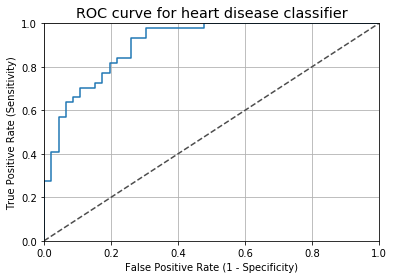

In [12]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for heart disease classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [13]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.9051383399209486

In [14]:
#@title Define helper functions {display-mode: "form"}

import pandas as pd
import numpy as np
import tensorflow as tf
import functools

# Creates a tf feature spec from the dataframe and columns specified.
def create_feature_spec(df, columns=None):
    feature_spec = {}
    if columns == None:
        columns = df.columns.values.tolist()
    for f in columns:
        if df[f].dtype is np.dtype(np.int64):
            feature_spec[f] = tf.io.FixedLenFeature(shape=(), dtype=tf.int64)
        elif df[f].dtype is np.dtype(np.float64):
            feature_spec[f] = tf.io.FixedLenFeature(shape=(), dtype=tf.float32)
        else:
            feature_spec[f] = tf.io.FixedLenFeature(shape=(), dtype=tf.string)
    return feature_spec

# Creates simple numeric and categorical feature columns from a feature spec and a
# list of columns from that spec to use.
#
# NOTE: Models might perform better with some feature engineering such as bucketed
# numeric columns and hash-bucket/embedding columns for categorical features.
def create_feature_columns(columns, feature_spec):
    ret = []
    for col in columns:
        if feature_spec[col].dtype is tf.int64 or feature_spec[col].dtype is tf.float32:
            ret.append(tf.feature_column.numeric_column(col))
        else:
            ret.append(tf.feature_column.indicator_column(
                tf.feature_column.categorical_column_with_vocabulary_list(col, list(df[col].unique()))))
    return ret

# An input function for providing input to a model from tf.Examples
def tfexamples_input_fn(examples, feature_spec, label, mode=tf.estimator.ModeKeys.EVAL,
                       num_epochs=None, 
                       batch_size=64):
    def ex_generator():
        for i in range(len(examples)):
            yield examples[i].SerializeToString()
    dataset = tf.data.Dataset.from_generator(
      ex_generator, tf.dtypes.string, tf.TensorShape([]))
    if mode == tf.estimator.ModeKeys.TRAIN:
        dataset = dataset.shuffle(buffer_size=2 * batch_size + 1)
    dataset = dataset.batch(batch_size)
    dataset = dataset.map(lambda tf_example: parse_tf_example(tf_example, label, feature_spec))
    dataset = dataset.repeat(num_epochs)
    return dataset

# Parses Tf.Example protos into features for the input function.
def parse_tf_example(example_proto, label, feature_spec):
    parsed_features = tf.io.parse_example(serialized=example_proto, features=feature_spec)
    target = parsed_features.pop(label)
    return parsed_features, target

# Converts a dataframe into a list of tf.Example protos.
def df_to_examples(df, columns=None):
    examples = []
    if columns == None:
        columns = df.columns.values.tolist()
    for index, row in df.iterrows():
        example = tf.train.Example()
        for col in columns:
            if df[col].dtype is np.dtype(np.int64):
                example.features.feature[col].int64_list.value.append(int(row[col]))
            elif df[col].dtype is np.dtype(np.bool):
                example.features.feature[col].int64_list.value.append(int(row[col]))
            elif df[col].dtype is np.dtype(np.float64):
                example.features.feature[col].float_list.value.append(row[col])
            elif row[col] == row[col]:
                example.features.feature[col].bytes_list.value.append(row[col].encode('utf-8'))
        examples.append(example)
    return examples

# Converts a dataframe column into a column of 0's and 1's based on the provided test.
# Used to force label columns to be numeric for binary classification using a TF estimator.
def make_label_column_numeric(df, label_column, test):
      df[label_column] = np.where(test(df[label_column]), 1, 0)

In [15]:
num_datapoints = 2000  #@param {type: "number"}
tool_height_in_px = 1000  #@param {type: "number"}

from witwidget.notebook.visualization import WitConfigBuilder
from witwidget.notebook.visualization import WitWidget
label_column = 'sick'
test_df = X_test
test_df['sick'] = y_test 
display(test_df)
# Load up the test dataset
#make_label_column_numeric(test_df, label_column, lambda val: val == '>50K.')
test_examples = df_to_examples(test_df[0:num_datapoints])

# Setup the tool with the test examples and the trained classifier
config_builder = WitConfigBuilder(test_examples)
WitWidget(config_builder, height=tool_height_in_px)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,resting_blood_pressure,cholestoral,fasting_blood_sugar,maximum_heart_rate,exercise_induced_angina,st_depression,num_colored_major_vessels,sex_male,chest_pain_type_angina,chest_pain_type_asympt,chest_pain_type_notang,resting_electrocardiographic_hyp,resting_electrocardiographic_norm,st_slope_flat,st_slope_up,thalassemias_norm,thalassemias_rev,sick
54,60,130.0,253.0,False,144.0,True,1.4,1.0,True,False,True,False,False,True,False,True,False,True,True
165,57,132.0,207.0,False,168.0,True,0.0,0.0,True,False,True,False,False,True,False,True,False,True,False
35,42,140.0,226.0,False,178.0,False,0.0,0.0,True,False,True,False,False,True,False,True,True,False,False
256,67,106.0,223.0,False,142.0,False,0.3,2.0,False,False,True,False,False,True,False,True,True,False,False
223,53,123.0,282.0,False,95.0,True,2.0,2.0,True,False,True,False,False,True,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,59,150.0,212.0,True,157.0,False,1.6,0.0,True,False,False,True,False,True,False,True,True,False,False
42,71,160.0,302.0,False,162.0,False,0.4,2.0,False,False,False,False,False,True,False,True,True,False,False
90,66,120.0,302.0,False,151.0,False,0.4,0.0,True,False,True,False,True,False,True,False,True,False,False
57,41,110.0,172.0,False,158.0,False,0.0,0.0,True,False,True,False,True,False,False,True,False,True,True


WitWidget(config={'model_type': 'classification', 'label_vocab': [], 'are_sequence_examples': False}, examples…

In [16]:
help(config_builder)

Help on WitConfigBuilder in module witwidget.notebook.visualization object:

class WitConfigBuilder(builtins.object)
 |  Configuration builder for WitWidget settings.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, examples, feature_names=None)
 |      Constructs the WitConfigBuilder object.
 |      
 |      Args:
 |        examples: A list of tf.Example or tf.SequenceExample proto objects, or
 |        raw JSON objects. JSON is allowed only for AI Platform-hosted models (see
 |        'set_ai_platform_model' and 'set_compare_ai_platform_model methods).
 |        These are the examples that will be displayed in WIT. If no model to
 |        infer these examples with is specified through the methods on this class,
 |        then WIT will display the examples for exploration, but no model inference
 |        will be performed by the tool.
 |        feature_names: Optional, defaults to None. If examples are provided as
 |        JSON lists of numbers (not as feature dictionaries), 